In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#Linear Regression

In [5]:
#1. assumption checking
    #1. linearity---independant and dependant variable must be linearly corelated(using correlation--heatmap)
    #2. no multi-colinearity---between the independant variable there not be linear correlation(using correlation--heatmap)
    #3. no auto-correlation---within the same column the previous value not correlated with next value 
    #4. no outliers (check using boxplot)
    #5. no null values

In [6]:
#1.linearity and #2.no multi-colinearity

In [7]:
#value between -0.1 and 0.1 ---> no correlated ,else correlated
#+ve correlation-->value greater than 0.1
#-ve correlation-->value less than 0.1

<Axes: >

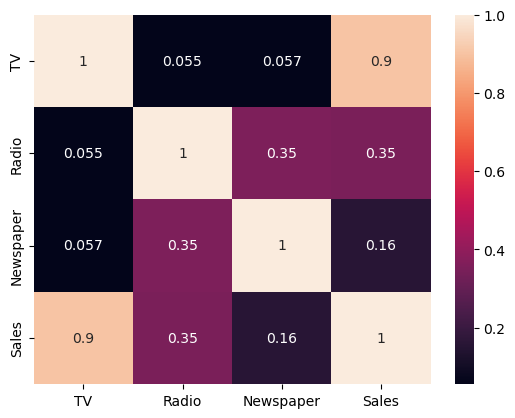

In [8]:
sns.heatmap(data.corr(),annot=True) 

In [9]:
#here newspaper and radio has correlation but bcz of lack of column should not drop column

In [10]:
#4.no outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x14929f8a140>,
 'caps': [<matplotlib.lines.Line2D at 0x14929f8a530>,
 'boxes': [<matplotlib.lines.Line2D at 0x14929f89ea0>,
 'medians': [<matplotlib.lines.Line2D at 0x14929f8aa70>,
 'fliers': [<matplotlib.lines.Line2D at 0x14929f8ad10>,
 'means': []}

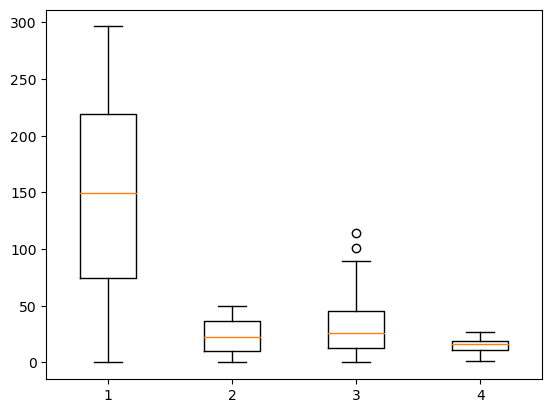

In [11]:
plt.boxplot(data)

In [12]:
#remove outlier
data_new = data[data["Newspaper"]<90]

{'whiskers': [<matplotlib.lines.Line2D at 0x1492a04ad40>,
 'caps': [<matplotlib.lines.Line2D at 0x1492a04b280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1492a04aaa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1492a04b7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1492a04ba60>],
 'means': []}

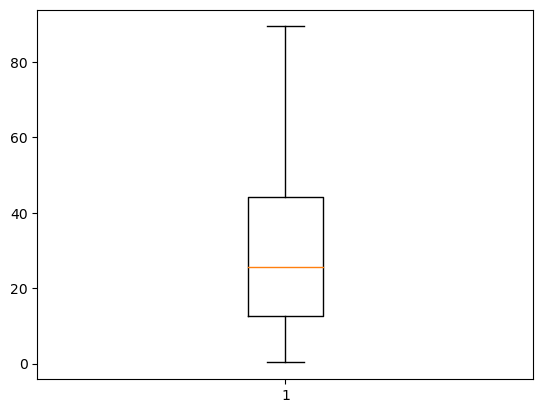

In [13]:
#checking after removing outlier
column = data_new["Newspaper"]
plt.boxplot(column)

In [14]:
data_new.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [15]:
#5. no null values

In [16]:
data_new.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [17]:
#check for special character
for i in data.columns:
    print(f"Unique values for column: {i}\n\n{data[i].unique()}\n")

Unique values for column: TV

[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7  53.5
 261.3 239.3 102.7 131.1  69.   31.5 139.3 216.8 199.1 109.8  26.8 129.4
 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4 213.5 193.2
  76.3 110.7  88.3 134.3  28.6 217.7 250.9 107.4 163.3 197.6 184.9 289.7
 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4  13.1 255.4 225.8
 241.7 175.7 209.6  78.2  75.1 139.2 125.7  19.4 141.3  18.8 224.  123.1
 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2   8.4 219.8  36.9  48.3
  25.6 273.7  43.   73.4 193.7 220.5 104.6  96.2 140.3 243.2  38.   44.7
 280.7 121.  171.3 187.8   4.1  93.9 149.8  11.7 131.7 172.5  85.7 188.4
 163.5 117.2 234.5  1

In [18]:
#no special characters #no null value

In [19]:
#Linear Regression
#y = b0 + b1x1 + b2x2 + b3x3...+ bnxn

#x1,x2,x3 --- independant variable
#y -- dependent variable
#b0 -- intercept--value of y when x=0 (can be -ve or +ve)
#b1,b2,b3 --- coeficients -- points on graph through which we find y
#best fit line---line closest to all datapoints

In [20]:
data_new.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [21]:
x = data_new[['TV','Radio','Newspaper']]
y = data_new[['Sales']]

In [22]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [23]:
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [24]:
data.shape

(200, 4)

In [25]:
x.shape

(198, 3)

In [26]:
y.shape

(198, 1)

In [27]:
#training and testing model
#70-80% training ,20-30% testing


In [28]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [29]:
#data divide in 4 parts
print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(158, 3)
(40, 3)

(158, 1)
(40, 1)


In [30]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [31]:
lm.fit(x_train,y_train) #train model

LinearRegression()

In [32]:
print(lm.coef_)

[[0.0557638  0.09941677 0.00059663]]


In [33]:
print(lm.intercept_)

[4.61207837]


In [34]:
#y = b0 + b1x1 + b2x2 + b3x3
#sales = b0 + b1"TV"+b2"Radio" +b3"Newspaper"

x1 =250
x2= 14
x3 = 67

y = 4.49462743 + (0.05452931*x1)+(0.1048269*x2)+(0.00524111*x3)
print(y)

19.9456859


In [35]:
#prediction
y_pred = lm.predict(x_test)

In [36]:
y_pred

array([[21.53174463],
       [12.63000058],
       [12.66069277],
       [ 9.59704692],
       [20.28206597],
       [16.04909341],
       [ 8.81560311],
       [12.11494198],
       [12.5938471 ],
       [13.81133243],
       [17.35107651],
       [ 9.08982387],
       [18.73189906],
       [18.41386124],
       [21.32065151],
       [21.23529417],
       [ 9.69086753],
       [14.8512315 ],
       [18.14009471],
       [12.6157736 ],
       [24.27420687],
       [ 8.96079599],
       [21.24256877],
       [20.65048385],
       [ 7.84785187],
       [16.95004531],
       [25.00272716],
       [18.09113189],
       [18.77989308],
       [21.08229407],
       [12.97957004],
       [16.67257336],
       [23.78456347],
       [17.39241135],
       [15.9824834 ],
       [14.92382023],
       [23.73924754],
       [21.52336196],
       [17.47115107],
       [13.27037635]])

In [51]:
new_df = pd.DataFrame() #create new table
new_df = x_test
new_df['actual Sales']= y_test
new_df['predicted Sales'] = y_pred
new_df

,TV,Radio,Newspaper,actual Sales,predicted Sales
109,255.4,26.9,5.5,19.8,21.531745
145,140.3,1.9,9.0,10.3,12.630001
31,112.9,17.4,38.6,11.9,12.660693
138,43.0,25.9,20.5,9.6,9.597047
15,195.4,47.7,52.9,22.4,20.282066
160,172.5,18.1,30.7,16.4,16.049093
66,31.5,24.6,2.2,11.0,8.815603
88,88.3,25.5,73.4,12.9,12.114942
90,134.3,4.9,9.3,14.0,12.593847
116,139.2,14.3,25.6,12.2,13.811332


In [52]:
lm.score(x_train,y_train)*100

90.22753158530278

In [54]:
#evaluation on testing data
from sklearn.metrics import r2_score,mean_squared_error

#It tells you how well the regression model is predicting as compared to the mean model
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

#Root Mean Square Error
#It gives an absolute number on how much your predicted results deviate from the actual number 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

R-squared: 0.8799157480109788
RMSE: 1.620686925374448


In [55]:
#R squared close to 1 → very good model
#R squared close to 0.5 → Needs tuning
#R squared close to 0 → Not a good model
#R squared less than 0 → Mean model is better than the regression model

In [56]:
#Low the RMSE better the model

In [57]:
#how to save the model

In [58]:
import joblib

In [59]:
joblib.dump(lm,"model.pkl")

['model.pkl']